In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats
import statsmodels.api as sm

In [77]:
first= pd.read_csv('train.csv')
second= pd.read_csv('meal_info.csv')
third=pd.read_csv('fulfilment_center_info.csv')

In [78]:
first1=pd.read_csv("test_QoiMO9B.csv")

In [79]:
first.shape

(456548, 9)

In [80]:
first1.shape

(32573, 8)

In [81]:
first.head()
first.shape
first.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
dtype: int64

In [82]:
second.head()
second.shape

(51, 3)

In [83]:
third.head()
third.shape

(77, 5)

In [84]:
first_second=pd.merge(first,second,on=["meal_id"],how="left")
first1_second=pd.merge(first1,second,on=["meal_id"],how="left")

In [85]:
first_second.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 11 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
category                 456548 non-null object
cuisine                  456548 non-null object
dtypes: float64(2), int64(7), object(2)
memory usage: 41.8+ MB


In [86]:
train=pd.merge(first_second,third,on=["center_id"],how="left")

test=pd.merge(first1_second,third,on=['center_id'],how='left')
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
category                 32573 non-null object
cuisine                  32573 non-null object
city_code                32573 non-null int64
region_code              32573 non-null int64
center_type              32573 non-null object
op_area                  32573 non-null float64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ MB


In [87]:
print("Shape of train data:",train.shape)
print("Shape of test data:",test.shape)

Shape of train data: (456548, 15)
Shape of test data: (32573, 14)


In [88]:
data=pd.concat([test,train])

C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [89]:
data.shape

(489121, 15)

In [90]:
## finding unique values of each categorical column
for i in data.select_dtypes(include=['object']).columns:
    print("Column Name: {}\n{}".format( i,data[i].unique()))

Column Name: category
['Beverages' 'Rice Bowl' 'Starters' 'Sandwich' 'Extras' 'Pizza' 'Seafood'
 'Other Snacks' 'Desert' 'Salad' 'Fish' 'Pasta' 'Biryani' 'Soup']
Column Name: center_type
['TYPE_C' 'TYPE_B' 'TYPE_A']
Column Name: cuisine
['Thai' 'Indian' 'Italian' 'Continental']


In [91]:
data.isnull().sum()


base_price                   0
category                     0
center_id                    0
center_type                  0
checkout_price               0
city_code                    0
cuisine                      0
emailer_for_promotion        0
homepage_featured            0
id                           0
meal_id                      0
num_orders               32573
op_area                      0
region_code                  0
week                         0
dtype: int64

In [92]:
data.head()

,base_price,category,center_id,center_type,checkout_price,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
0,159.11,Beverages,55,TYPE_C,158.11,647,Thai,0,0,1028232,1885,NaN,2.0,56,146
1,159.11,Beverages,55,TYPE_C,160.11,647,Thai,0,0,1127204,1993,NaN,2.0,56,146
2,159.14,Beverages,55,TYPE_C,157.14,647,Thai,0,0,1212707,2539,NaN,2.0,56,146
3,162.02,Beverages,55,TYPE_C,162.02,647,Indian,0,0,1082698,2631,NaN,2.0,56,146
4,163.93,Beverages,55,TYPE_C,163.93,647,Indian,0,0,1400926,1248,NaN,2.0,56,146


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 456547
Data columns (total 15 columns):
base_price               489121 non-null float64
category                 489121 non-null object
center_id                489121 non-null int64
center_type              489121 non-null object
checkout_price           489121 non-null float64
city_code                489121 non-null int64
cuisine                  489121 non-null object
emailer_for_promotion    489121 non-null int64
homepage_featured        489121 non-null int64
id                       489121 non-null int64
meal_id                  489121 non-null int64
num_orders               456548 non-null float64
op_area                  489121 non-null float64
region_code              489121 non-null int64
week                     489121 non-null int64
dtypes: float64(4), int64(8), object(3)
memory usage: 59.7+ MB


In [96]:
data.city_code.nunique()

51

In [97]:
#plt.bar(train.city_code,train.num_orders)

In [98]:
data.describe()

,base_price,center_id,checkout_price,city_code,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
count,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,4.891210e+05,489121.000000,456548.000000,489121.000000,489121.000000,489121.000000
mean,354.312259,82.092206,332.879277,601.551172,0.080172,0.107346,1.249988e+06,2024.852268,261.872760,4.083865,56.621065,79.810613
std,160.352168,45.973390,153.022073,66.182598,0.271560,0.309552,1.443421e+05,547.408978,395.922798,1.092163,17.641296,44.343325
min,55.350000,10.000000,2.970000,456.000000,0.000000,0.000000,1.000000e+06,1062.000000,13.000000,0.900000,23.000000,1.000000
25%,243.500000,43.000000,228.010000,553.000000,0.000000,0.000000,1.124937e+06,1558.000000,54.000000,3.600000,34.000000,42.000000
50%,311.430000,76.000000,299.760000,596.000000,0.000000,0.000000,1.249977e+06,1993.000000,136.000000,4.000000,56.000000,81.000000
75%,458.810000,110.000000,445.230000,651.000000,0.000000,0.000000,1.374988e+06,2539.000000,324.000000,4.500000,77.000000,118.000000
max,1112.620000,186.000000,1113.620000,713.000000,1.000000,1.000000,1.499999e+06,2956.000000,24299.000000,7.000000,93.000000,155.000000


# Univariate Analysis

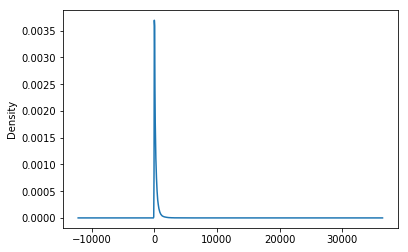

In [99]:
data["num_orders"].plot.kde()
## Data is very much skewed towards right

In [100]:
data.isnull().sum()

base_price                   0
category                     0
center_id                    0
center_type                  0
checkout_price               0
city_code                    0
cuisine                      0
emailer_for_promotion        0
homepage_featured            0
id                           0
meal_id                      0
num_orders               32573
op_area                      0
region_code                  0
week                         0
dtype: int64

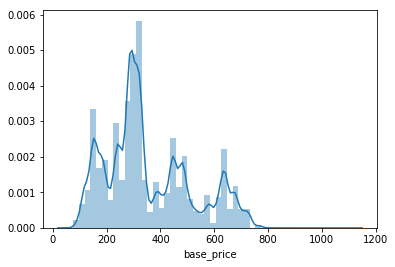

In [101]:
sns.distplot(data.base_price)

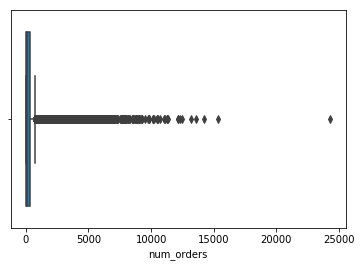

In [102]:
sns.boxplot(data.num_orders)

Outlier observed which is causing skewness in our data and deviating from normal curve

In [103]:
data.region_code.nunique()

8

In [104]:
data.city_code.nunique()

51

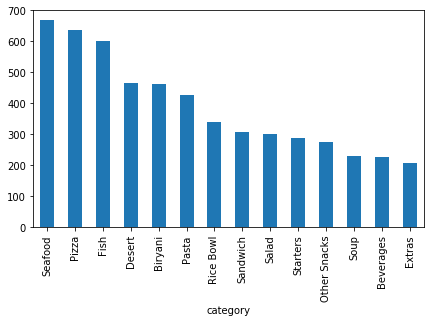

In [105]:
plt.figure(figsize=(7,4))
data.groupby('category')['base_price'].mean().sort_values(ascending=False).plot(kind='bar')

### Seafood having the highest Price or most expensive followed by Pizza

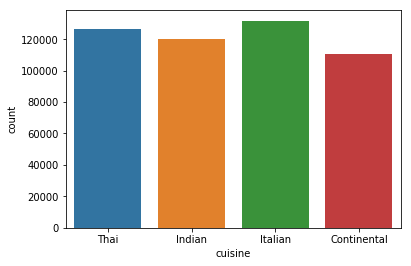

In [106]:
sns.countplot(data.cuisine)

## Bivariate analysis

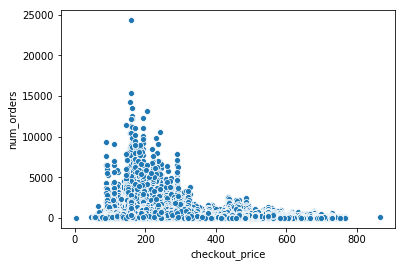

In [107]:
sns.scatterplot(data.checkout_price,data.num_orders)

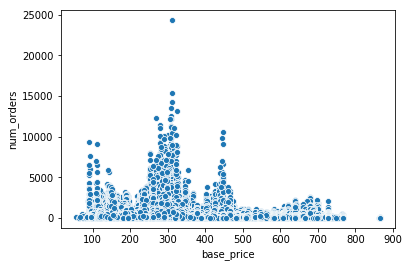

In [108]:
sns.scatterplot(data.base_price,data.num_orders)

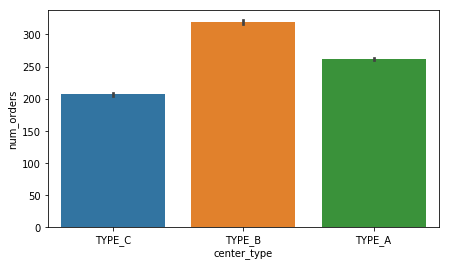

In [109]:
plt.figure(figsize=(7,4))
sns.barplot(data.center_type,data.num_orders)

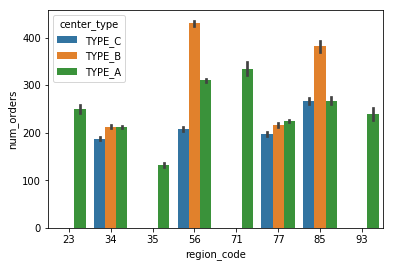

In [110]:
sns.barplot(data.region_code,data.num_orders,hue=data.center_type)

#### Type A center is reaching to all the regions even where B and C are not delivering. but even then the center type A is having less orders as compared to B. Means A is delivering to regions which could be remote areas where people buy occasionally.

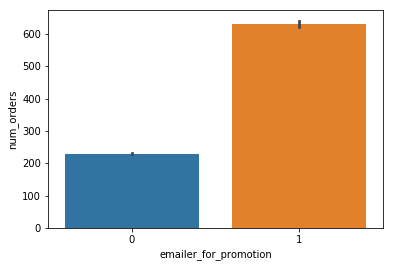

In [111]:
sns.barplot(data.emailer_for_promotion,data.num_orders)

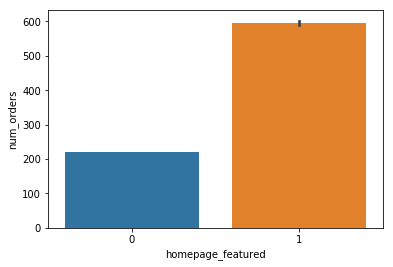

In [112]:
sns.barplot(data.homepage_featured,data.num_orders)

In [113]:
data.week.nunique()

155

In [114]:
data.describe()

,base_price,center_id,checkout_price,city_code,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week
count,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,4.891210e+05,489121.000000,456548.000000,489121.000000,489121.000000,489121.000000
mean,354.312259,82.092206,332.879277,601.551172,0.080172,0.107346,1.249988e+06,2024.852268,261.872760,4.083865,56.621065,79.810613
std,160.352168,45.973390,153.022073,66.182598,0.271560,0.309552,1.443421e+05,547.408978,395.922798,1.092163,17.641296,44.343325
min,55.350000,10.000000,2.970000,456.000000,0.000000,0.000000,1.000000e+06,1062.000000,13.000000,0.900000,23.000000,1.000000
25%,243.500000,43.000000,228.010000,553.000000,0.000000,0.000000,1.124937e+06,1558.000000,54.000000,3.600000,34.000000,42.000000
50%,311.430000,76.000000,299.760000,596.000000,0.000000,0.000000,1.249977e+06,1993.000000,136.000000,4.000000,56.000000,81.000000
75%,458.810000,110.000000,445.230000,651.000000,0.000000,0.000000,1.374988e+06,2539.000000,324.000000,4.500000,77.000000,118.000000
max,1112.620000,186.000000,1113.620000,713.000000,1.000000,1.000000,1.499999e+06,2956.000000,24299.000000,7.000000,93.000000,155.000000


In [115]:
data["discount"]=data.base_price-data.checkout_price

In [116]:
i=data[data["discount"]<=0].index

In [117]:
data.loc[i,"discount"]=0

Items with no discount in negetive are converted to 0 discount

#### Now we can drop Checkout price column as valuable insight is taken from that column.

In [118]:
data.drop('checkout_price',axis=1,inplace=True)

In [119]:
data.head(10)

,base_price,category,center_id,center_type,city_code,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week,discount
0,159.11,Beverages,55,TYPE_C,647,Thai,0,0,1028232,1885,NaN,2.0,56,146,1.0
1,159.11,Beverages,55,TYPE_C,647,Thai,0,0,1127204,1993,NaN,2.0,56,146,0.0
2,159.14,Beverages,55,TYPE_C,647,Thai,0,0,1212707,2539,NaN,2.0,56,146,2.0
3,162.02,Beverages,55,TYPE_C,647,Indian,0,0,1082698,2631,NaN,2.0,56,146,0.0
4,163.93,Beverages,55,TYPE_C,647,Indian,0,0,1400926,1248,NaN,2.0,56,146,0.0
5,190.15,Beverages,55,TYPE_C,647,Italian,0,0,1284113,1778,NaN,2.0,56,146,0.0
6,192.09,Beverages,55,TYPE_C,647,Italian,0,0,1197966,1062,NaN,2.0,56,146,1.0
7,240.56,Beverages,55,TYPE_C,647,Italian,0,0,1132739,2707,NaN,2.0,56,146,0.0
8,360.90,Beverages,55,TYPE_C,647,Continental,0,0,1057981,1207,NaN,2.0,56,146,0.0
9,384.18,Beverages,55,TYPE_C,647,Continental,0,0,1095932,1230,NaN,2.0,56,146,1.0


In [120]:
data.week.max()

155

In [121]:
data.week.value_counts()

122    3359
105    3348
106    3347
148    3332
140    3332
123    3331
134    3330
133    3324
149    3313
113    3312
100    3309
143    3305
94     3303
144    3302
114    3300
109    3299
121    3298
131    3293
110    3293
129    3291
117    3290
91     3289
101    3288
115    3286
137    3283
90     3282
98     3282
95     3279
139    3279
128    3278
       ... 
26     3014
35     3004
38     2999
37     2997
25     2972
21     2963
18     2962
23     2960
24     2946
19     2939
20     2924
22     2923
1      2922
3      2899
2      2896
62     2890
4      2889
17     2888
15     2868
11     2863
10     2859
5      2859
9      2854
16     2850
6      2846
13     2838
12     2831
14     2830
7      2795
8      2786
Name: week, Length: 155, dtype: int64

#### Lets see the area where Type b centre is located and find out why its having the highest sales

In [122]:
data[data.center_type=='TYPE_B']['op_area'].value_counts()

4.4    14594
3.9    12255
6.7     7555
6.3     7523
5.6     7499
7.0     7414
5.0     6602
4.7     6406
3.8     6367
4.1     6352
4.0     6349
4.2     6318
3.6     5688
Name: op_area, dtype: int64

In [123]:
data[data.center_type=='TYPE_B']['cuisine'].value_counts()

Thai           26305
Italian        26121
Indian         25148
Continental    23348
Name: cuisine, dtype: int64

In [124]:
data[data.center_type=='TYPE_A']['cuisine'].value_counts()

Italian        74447
Thai           74106
Indian         69470
Continental    63574
Name: cuisine, dtype: int64

In [125]:
data[data.center_type=='TYPE_C']['cuisine'].value_counts()

Italian        31193
Thai           26147
Indian         25801
Continental    23461
Name: cuisine, dtype: int64

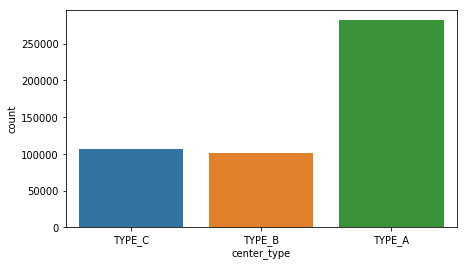

In [126]:
plt.figure(figsize=(7,4))
sns.countplot(data.center_type)  ## Type A is reachable the most regions.

## Which cuisine in beverages is sold the maximum

In [127]:
data[data['category']=='Beverages'].sort_values(by='num_orders',ascending=False)[['cuisine','category','num_orders']].head(5)

,cuisine,category,num_orders
134510,Thai,Beverages,9303.0
300881,Thai,Beverages,9045.0
131423,Thai,Beverages,7602.0
307398,Thai,Beverages,7007.0
143788,Thai,Beverages,6576.0


Thai is the most selling cuisine in beverages

In [128]:
data.category.value_counts()

Beverages       136781
Rice Bowl        35717
Sandwich         35599
Pizza            35444
Starters         31925
Other Snacks     31483
Desert           31407
Salad            30868
Pasta            29621
Seafood          28613
Biryani          21951
Extras           14554
Soup             13640
Fish             11518
Name: category, dtype: int64

In [129]:
data.category.replace('Fish','Seafood',inplace=True)
data.category.replace(['Salad','Soup'],'Extras',inplace=True)
data.category.replace('Other Snacks','Starters',inplace=True)
data.category.replace('Biryani','Rice Bowl',inplace=True)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 456547
Data columns (total 15 columns):
base_price               489121 non-null float64
category                 489121 non-null object
center_id                489121 non-null int64
center_type              489121 non-null object
city_code                489121 non-null int64
cuisine                  489121 non-null object
emailer_for_promotion    489121 non-null int64
homepage_featured        489121 non-null int64
id                       489121 non-null int64
meal_id                  489121 non-null int64
num_orders               456548 non-null float64
op_area                  489121 non-null float64
region_code              489121 non-null int64
week                     489121 non-null int64
discount                 489121 non-null float64
dtypes: float64(4), int64(8), object(3)
memory usage: 79.7+ MB


In [131]:
data.groupby('city_code')['region_code','center_type','city_code'].head() ## can see that region code,center_type and city code are related to each other.

,region_code,center_type,city_code
0,56,TYPE_C,647
1,56,TYPE_C,647
2,56,TYPE_C,647
3,56,TYPE_C,647
4,56,TYPE_C,647
35,85,TYPE_B,614
36,85,TYPE_B,614
37,85,TYPE_B,614
38,85,TYPE_B,614
39,85,TYPE_B,614


In [132]:
data.center_type.value_counts(normalize=True)  ## This has 60 % of the data so it will create biasness in our data

TYPE_A    0.575721
TYPE_C    0.217946
TYPE_B    0.206333
Name: center_type, dtype: float64

In [133]:
data.center_type=train.center_type.replace(["TYPE_B","TYPE_C","TYPE_A"],['Others','Others','TYPE_A'])

In [134]:
data.city_code.nunique()

51

In [135]:
data.describe()

,base_price,center_id,city_code,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week,discount
count,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,4.891210e+05,489121.000000,456548.000000,489121.000000,489121.000000,489121.000000,489121.000000
mean,354.312259,82.092206,601.551172,0.080172,0.107346,1.249988e+06,2024.852268,261.872760,4.083865,56.621065,79.810613,20.591609
std,160.352168,45.973390,66.182598,0.271560,0.309552,1.443421e+05,547.408978,395.922798,1.092163,17.641296,44.343325,46.599322
min,55.350000,10.000000,456.000000,0.000000,0.000000,1.000000e+06,1062.000000,13.000000,0.900000,23.000000,1.000000,0.000000
25%,243.500000,43.000000,553.000000,0.000000,0.000000,1.124937e+06,1558.000000,54.000000,3.600000,34.000000,42.000000,0.000000
50%,311.430000,76.000000,596.000000,0.000000,0.000000,1.249977e+06,1993.000000,136.000000,4.000000,56.000000,81.000000,0.000000
75%,458.810000,110.000000,651.000000,0.000000,0.000000,1.374988e+06,2539.000000,324.000000,4.500000,77.000000,118.000000,2.000000
max,1112.620000,186.000000,713.000000,1.000000,1.000000,1.499999e+06,2956.000000,24299.000000,7.000000,93.000000,155.000000,776.000000


In [136]:
data.isnull().sum().sum()

32573

In [137]:
## Binning Price column
bin_edges=[55,250,310,458,867]
bin_names=['Low',"Average","High",'Higher']
data.base_price=pd.cut(data.base_price,bin_edges,4,bin_names)

In [138]:
data['num_orders_log']=np.log(data.num_orders)

#### We see that city code is very much dependent on region_code and center_type.
#### So removing this column will lead to better inferences as its a column not worth to be kept

In [139]:
data.drop(['city_code'],axis=1,inplace=True)

In [140]:
data.head()

,base_price,category,center_id,center_type,cuisine,emailer_for_promotion,homepage_featured,id,meal_id,num_orders,op_area,region_code,week,discount,num_orders_log
0,Low,Beverages,55,Others,Thai,0,0,1028232,1885,NaN,2.0,56,146,1.0,NaN
1,Low,Beverages,55,Others,Thai,0,0,1127204,1993,NaN,2.0,56,146,0.0,NaN
2,Low,Beverages,55,Others,Thai,0,0,1212707,2539,NaN,2.0,56,146,2.0,NaN
3,Low,Beverages,55,Others,Indian,0,0,1082698,2631,NaN,2.0,56,146,0.0,NaN
4,Low,Beverages,55,Others,Indian,0,0,1400926,1248,NaN,2.0,56,146,0.0,NaN


In [141]:
x=data.drop(['num_orders','num_orders_log','id','meal_id','center_id'],axis=1)
y=data.num_orders_log

In [142]:
## change here

In [143]:
data[data.num_orders_log.isnull()].shape

(32573, 15)

In [144]:
## one hot encoding
x_dummy=pd.get_dummies(x,drop_first=True)

In [145]:
## Train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_dummy,y,test_size=0.2,random_state=2)

In [146]:
x_dummy.isnull().sum()

emailer_for_promotion    0
homepage_featured        0
op_area                  0
region_code              0
week                     0
discount                 0
base_price_Average       0
base_price_High          0
base_price_Higher        0
category_Desert          0
category_Extras          0
category_Pasta           0
category_Pizza           0
category_Rice Bowl       0
category_Sandwich        0
category_Seafood         0
category_Starters        0
center_type_TYPE_A       0
cuisine_Indian           0
cuisine_Italian          0
cuisine_Thai             0
dtype: int64

In [147]:
### Scaling

In [148]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [149]:
xtrain_scaled=sc.fit_transform(xtrain)
xtest_scaled=sc.transform(xtest)

C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


## Linear regression

In [150]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [151]:
ypred=lr.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [152]:
from sklearn.metrics import r2_score,mean_squared_error

In [153]:
r2_score(ytest,ypred)

NameError: name 'ypred' is not defined

In [154]:
np.sqrt(mean_squared_error(ytest,ypred))

NameError: name 'ypred' is not defined

### Backward elimination

In [155]:
import statsmodels.formula.api as smf
#creating constant for stats models
x['constant'] = 1

In [156]:
model = smf.OLS(endog =y , exog=x_dummy).fit()

In [157]:
model.summary()

C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\sja\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1429: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         num_orders_log   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 19 Nov 2019   Prob (F-statistic):                nan
Time:                        01:16:13   Log-Likelihood:                    nan
No. Observations:              489121   AIC:                               nan
Df Residuals:                  489100   BIC:                               nan
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
emailer_for_promotion        nan        nan        nan        nan         nan         nan
homepage_featured            nan        nan        nan        nan         nan         nan
op_area                      nan        nan        nan        nan         nan         nan
region_code                  nan        nan        nan        nan         nan         nan
week                         nan        nan        nan        nan         nan         nan
discount                     nan        nan        nan        nan         nan         nan
base_price_Average           nan        nan        nan        nan         nan         nan
base_price_High              nan        nan        nan        nan         nan         nan
base_price_Higher            nan        nan        nan        nan         nan         nan
category_Desert              nan        nan        nan        nan         nan         nan
category_Extras              nan        nan        nan        nan         nan         nan
category_Pasta               nan        nan        nan        nan         nan         nan
category_Pizza               nan        nan        nan        nan         nan         nan
category_Rice Bowl           nan        nan        nan        nan         nan         nan
category_Sandwich            nan        nan        nan        nan         nan         nan
category_Seafood             nan        nan        nan        nan         nan         nan
category_Starters            nan        nan        nan        nan         nan         nan
center_type_TYPE_A           nan        nan        nan        nan         nan         nan
cuisine_Indian               nan        nan        nan        nan         nan         nan
cuisine_Italian              nan        nan        nan        nan         nan         nan
cuisine_Thai                 nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
## Lasso 
from sklearn.linear_model import Lasso
La=Lasso()

In [ ]:
ypred_lasso=La.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [ ]:
r2_score(ytest,ypred_lasso)

In [ ]:
np.sqrt(mean_squared_error(ytest,ypred_lasso))

### Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF= RandomForestRegressor()

In [ ]:
ypred_RF=RF.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [ ]:
np.sqrt(mean_squared_error(ytest,ypred_RF))

In [ ]:
r2_score(ytest,ypred_RF)

In [ ]:
pd.DataFrame({'Importances':RF.feature_importances_*100},index=xtrain.columns).sort_values(by='Importances',ascending=True).plot(kind='barh')

In [ ]:
## by taking only the top 5 features
pd.DataFrame({'Importances':RF.feature_importances_*100},index=xtrain.columns).sort_values(by='Importances',ascending=False).head(25)

In [ ]:
xtrain=xtrain.drop(['category_Desert'],axis=1)
xtest=xtest.drop(['category_Desert'],axis=1)


In [ ]:
## Scaling
xtrain_scaled=sc.fit_transform(xtrain)
xtest_scaled=sc.transform(xtest)

In [ ]:
RF2=RandomForestRegressor()
ypred_RF2=RF2.fit(xtrain_scaled,ytrain).predict(xtest_scaled)

In [ ]:
r2_score(ytest,ypred_RF2)

In [ ]:
np.sqrt(mean_squared_error(ytest,ypred_RF2))